In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [4]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 14kB/s 
     |████████████████████████████████| 4.0MB 45.9MB/s 
  Found existing installation: torch 1.5.1+cu101
    Uninstalling torch-1.5.1+cu101:
      Successfully uninstalled torch-1.5.1+cu101
  Found existing installation: torchvision 0.6.1+cu101
    Uninstalling torchvision-0.6.1+cu101:
      Successfully uninstalled torchvision-0.6.1+cu101


In [1]:
from fastai.vision import *
from fastai import *

In [3]:
!pip list

Package                  Version        
------------------------ ---------------
absl-py                  0.9.0          
alabaster                0.7.12         
albumentations           0.1.12         
altair                   4.1.0          
asgiref                  3.2.10         
astor                    0.8.1          
astropy                  4.0.1.post1    
astunparse               1.6.3          
atari-py                 0.2.6          
atomicwrites             1.4.0          
attrs                    19.3.0         
audioread                2.1.8          
autograd                 1.3            
Babel                    2.8.0          
backcall                 0.2.0          
beautifulsoup4           4.6.3          
bleach                   3.1.5          
blis                     0.4.1          
bokeh                    2.1.1          
boto                     2.49.0         
boto3                    1.14.24        
botocore                 1.17.24        
Bottleneck      

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
folder = 'lions'
file = 'urls_lions.txt'

In [ ]:
folder = 'cheetahs'
file = 'urls_cheetahs.txt'

In [ ]:
folder = 'leopards'
file = 'urls_leopards.txt'

In [ ]:
#create a folder in gdrive at :: My drive> fastai-v3 > data > wildcats    for each of the classes

path = Path(base_dir + 'data/wildcats')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [ ]:
dest = path/folder

In [3]:
path = Path(base_dir + 'data/wildcats')

In [ ]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/wildcats/cheetahs'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/wildcats/leopards'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/wildcats/tigers'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/wildcats/lions'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/wildcats/puma'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/wildcats/lynx'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/wildcats/black-panther')]

In [ ]:
classes = ['lions','tigers','cheetahs','leopards','puma','lynx','black-panther']

In [ ]:
#to download images from the url_text into the dest folder for each of the classes

download_images(path/file, dest, max_pics=200)

In [ ]:
#checking for corrupted files 

for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

lions


tigers


cheetahs


leopards


puma


lynx


black-panther


 **To view data**

In [ ]:
np.random.seed(2)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.3,
        ds_tfms=get_transforms(), size=140, num_workers=4).normalize(imagenet_stats)

In [ ]:
data

ImageDataBunch;

Train: LabelList (805 items)
x: ImageList
Image (3, 140, 140),Image (3, 140, 140),Image (3, 140, 140),Image (3, 140, 140),Image (3, 140, 140)
y: CategoryList
cheetahs,cheetahs,cheetahs,cheetahs,cheetahs
Path: /content/gdrive/My Drive/fastai-v3/data/wildcats;

Valid: LabelList (344 items)
x: ImageList
Image (3, 140, 140),Image (3, 140, 140),Image (3, 140, 140),Image (3, 140, 140),Image (3, 140, 140)
y: CategoryList
lynx,lynx,puma,black-panther,lynx
Path: /content/gdrive/My Drive/fastai-v3/data/wildcats;

Test: None

In [ ]:
data.classes

['black-panther', 'cheetahs', 'leopards', 'lions', 'lynx', 'puma', 'tigers']

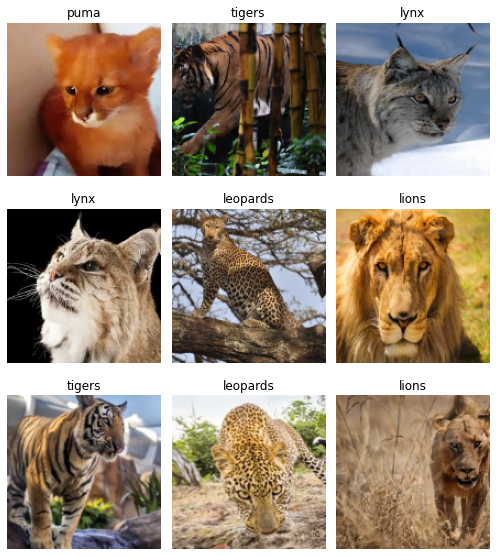

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cheetahs', 'leopards', 'lions', 'tigers'], 4, 441, 110)

**TRAIN CNN**

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [ ]:
learn

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


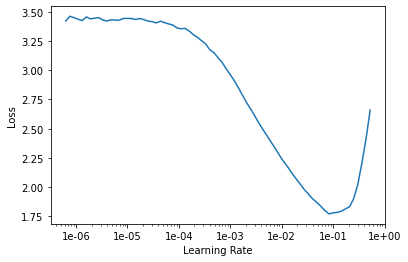

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1, max_lr=slice(1e-3,1e-2))     #2 epochs with moodified learning rate

epoch,train_loss,valid_loss,error_rate,time
0,0.278625,0.371403,0.093023,00:12


In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find(num_it=50)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


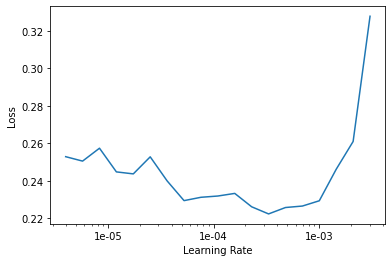

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))     #2 epochs with moodified learning rate

epoch,train_loss,valid_loss,error_rate,time
0,0.359531,0.853773,0.151163,00:12
1,0.411278,0.705215,0.142442,00:12


In [ ]:
learn.save('stage-2')

**Interpretation**

In [ ]:
learn.load('stage-1');

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

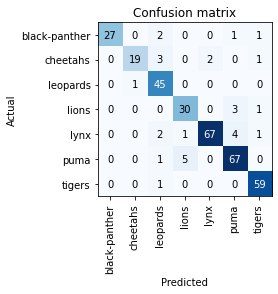

In [ ]:
interp.plot_confusion_matrix()

### **Cleaning up**

In [ ]:
from fastai.widgets import *

losses, idxs = interp.top_losses()
top_losses_paths = data.valid_ds.x[idxs]

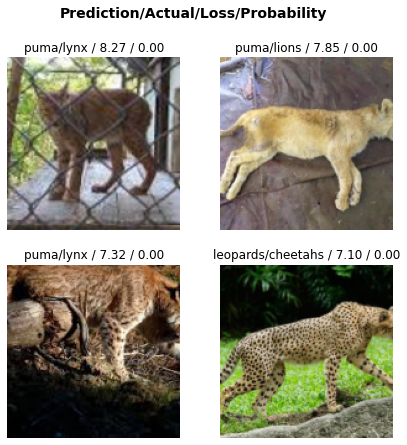

In [ ]:
interp.plot_top_losses(4, figsize=(7,7))

### **Putting model into production**

In [ ]:
data.classes

['cheetahs', 'leopards', 'lions', 'tigers']

In [ ]:
defaults.device = torch.device('cpu')

In [ ]:
learn.export()

In [6]:
p = Path(base_dir + 'data/wildcats_test')

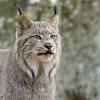

In [8]:
img = open_image(p/'Lynx.jpeg')
img

In [4]:
path = Path(base_dir + 'data/wildcats')
 
learn = load_learner(path, 'model.pkl')

In [9]:
pred_class,pred_idx,outputs = learn.predict(img)
print(pred_class)

lynx


In [ ]:
path2=Path(base_dir + 'data/wildcats_test')

leopards
leopards
tigers
leopards


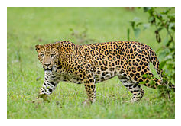

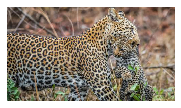

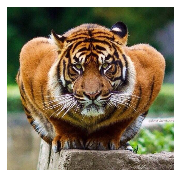

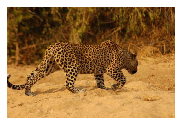

In [ ]:
for i in range(10,14):
  s = str(i)+'.jpg'
  img=open_image(p/'test_images'/s)
  pred_class,pred_idx,outputs = learn.predict(img)
  img.show()
  print(pred_class)